# Facial Emotion Detection
_MIT Applied Data Science program_



**The context:** Why is this problem important to solve?

**The objectives:** The intended goal of this project is to train a machine learning model to analyze and detect facial emotions.

**The key questions:** What are the key questions that need to be answered?

**The problem formulation:** What are we trying to solve using data science?


## Import Libraries

In [20]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [21]:
import jax
print(jax.__version__)

0.4.31


# Analyze the Dataset

The goal of this section is to understand, analyze and evaluate the dataset that we have received.  This includes the following:
- Evaluating the Train/Test/Validate distribution
- Understanding file types and image formats
- Transforming images to tensors that we will be able to utilize within Jax
- Condensing the files to a proper format to utilize within a Jax neural network

In [22]:
# Assuming the dataset is already unzipped
path = os.path.relpath("Facial_emotion_images")
files = os.listdir(path)

# This should contain our Train/Test/Split
files

['test', 'train', 'validation']

In [23]:
# Now we will take a look at the contents in one of these folders.
emotions = os.listdir(path+"/test")
emotions

['happy', 'sad', 'surprise', 'neutral']

In [24]:
# Generates a list file for the files within the folder
sample_files = os.listdir(path + "/test/" + emotions[0])
len(sample_files)

32

In [25]:
# Generates the path to above file locations
current_path = (path + "/test/" + emotions[0])
current_path

'Facial_emotion_images/test/happy'

In [26]:
x = jnp.asarray(Image.open(current_path + "/" + sample_files[0]))
x.shape

(48, 48)

In [27]:
path, files

('Facial_emotion_images', ['test', 'train', 'validation'])

In [28]:
# Initialize the empty lists we will sorth these files within
data, final = {}, {}

# First we will go through each datatype (test/train/validation)
for datatype in files:
    
    # We will generate these layer files to cumulatively update the directory path
    layer2 = path + "/" + datatype
    
    # Now we cycle through each emotion (Already defined as a list previously)
    for emotion in emotions:
        layer3 = layer2 + "/" + emotion

        # Update our initial data dictionary to add the empty list we will fill with arrays
        data.update({f"{datatype}_{emotion}":[]})

        # We first list all the files in our current rolling directory path
        sample_files = os.listdir(layer3)

        # Then we iterate through that target list
        for images in sample_files:
            data[f"{datatype}_{emotion}"].append(jnp.asarray(Image.open(layer3 + "/" + images)))
        final.update({f"{datatype}_{emotion}" : jnp.stack(data[f"{datatype}_{emotion}"])})         

In [29]:
# Let's print out the different files we have here
[x for x in final.keys()]

['test_happy',
 'test_sad',
 'test_surprise',
 'test_neutral',
 'train_happy',
 'train_sad',
 'train_surprise',
 'train_neutral',
 'validation_happy',
 'validation_sad',
 'validation_surprise',
 'validation_neutral']

In [223]:
# Let's pull the data out of our dictionary and convert to numpy arrays

test_happy = torch.from_numpy(final["test_happy"])
test_sad = torch.from_numpy(final["test_sad"])
test_surprise = torch.from_numpy(final["test_surprise"])
test_neutral = torch.from_numpy(final["test_neutral"])
train_happy = torch.from_numpy(final["train_happy"])
train_sad = torch.from_numpy(final["train_sad"])
train_surprise = torch.from_numpy(final["train_surprise"])
train_neutral = torch.from_numpy(final["train_neutral"])
validation_happy = torch.from_numpy(final["validation_happy"])
validation_sad = torch.from_numpy(final["validation_sad"])
validation_surprise = torch.from_numpy(final["validation_surprise"])
validation_neutral = torch.from_numpy(final["validation_neutral"])

# Let us evaluate one of these files just to ensure the conversion went correctly.
print(train_happy.shape)
print(type(train_happy))

torch.Size([3976, 48, 48])
<class 'torch.Tensor'>


In [224]:
# Next we will be creating our general X and Y classes

# We will combine these using the np.concat command to generate our independent variables
test_x = np.concat((test_happy, test_sad, test_suprise, test_neutral))
train_x = np.concat((train_happy, train_sad, train_surprise, train_neutral))
validation_x = np.concat((validation_happy, validation_sad, validation_suprise, validation_neutral))

In [225]:
# Here we will verify that the we maintain the 48x48 image shape
test_x.shape, train_x.shape, validation_x.shape

((128, 48, 48), (15109, 48, 48), (4977, 48, 48))

In [226]:
# We will now perform a similar task to generate our Target Variable output.
# It is important that we concat these in the same order as the previous cell
test_y = np.concat([
    np.full(test_happy.shape[0], 0), 
    np.full(test_sad.shape[0], 1), 
    np.full(test_suprise.shape[0], 2), 
    np.full(test_neutral.shape[0], 3)
])

train_y = np.concat([
    np.full(train_happy.shape[0], 0), 
    np.full(train_sad.shape[0], 1), 
    np.full(train_suprise.shape[0], 2), 
    np.full(train_neutral.shape[0], 3)
])

validation_y = np.concat([
    np.full(validation_happy.shape[0], 0), 
    np.full(validation_sad.shape[0], 1), 
    np.full(validation_suprise.shape[0], 2), 
    np.full(validation_neutral.shape[0], 3)
])

In [227]:
test_y.shape, train_y.shape, validation_y.shape

((128,), (15109,), (4977,))

In [228]:
# In order to utilize these images though we need to introduce a randomization factor.
# First we will define a seed.
seed = 42

# We will import shuffle which will allow us to shuffle the arrays in unison
from sklearn.utils import shuffle

# We will utilize generate a list of random numbers to utilize different states for each shuffle
rng = np.random.default_rng(seed)
shuffle_seeds = rng.integers(low=0, high=999, size=3)

In [229]:
# Lets print some test numbers to evaluate our shuffle
train_x[0].mean(), train_y[0], test_x[0].mean(), test_y[0], validation_x[0].mean(), validation_y[0]

(np.float64(175.90755208333334),
 np.int64(0),
 np.float64(121.55338541666667),
 np.int64(0),
 np.float64(100.9296875),
 np.int64(0))

In [230]:
train_x, train_y = shuffle(train_x, train_y, random_state=shuffle_seeds[0])
test_x, test_y = shuffle(test_x, test_y, random_state=shuffle_seeds[1])
validation_x, validation_y = shuffle(validation_x, validation_y, random_state=shuffle_seeds[2])

In [231]:
# If these numbers have changed, it shows that we have correctly shuffled the images
train_x[0].mean(), train_y[0], test_x[0].mean(), test_y[0], validation_x[0].mean(), validation_y[0]

(np.float64(142.93836805555554),
 np.int64(0),
 np.float64(135.86588541666666),
 np.int64(0),
 np.float64(117.93229166666667),
 np.int64(1))

# Visualizing the Images

We have now established our dataset! Let's take a look at some examples.

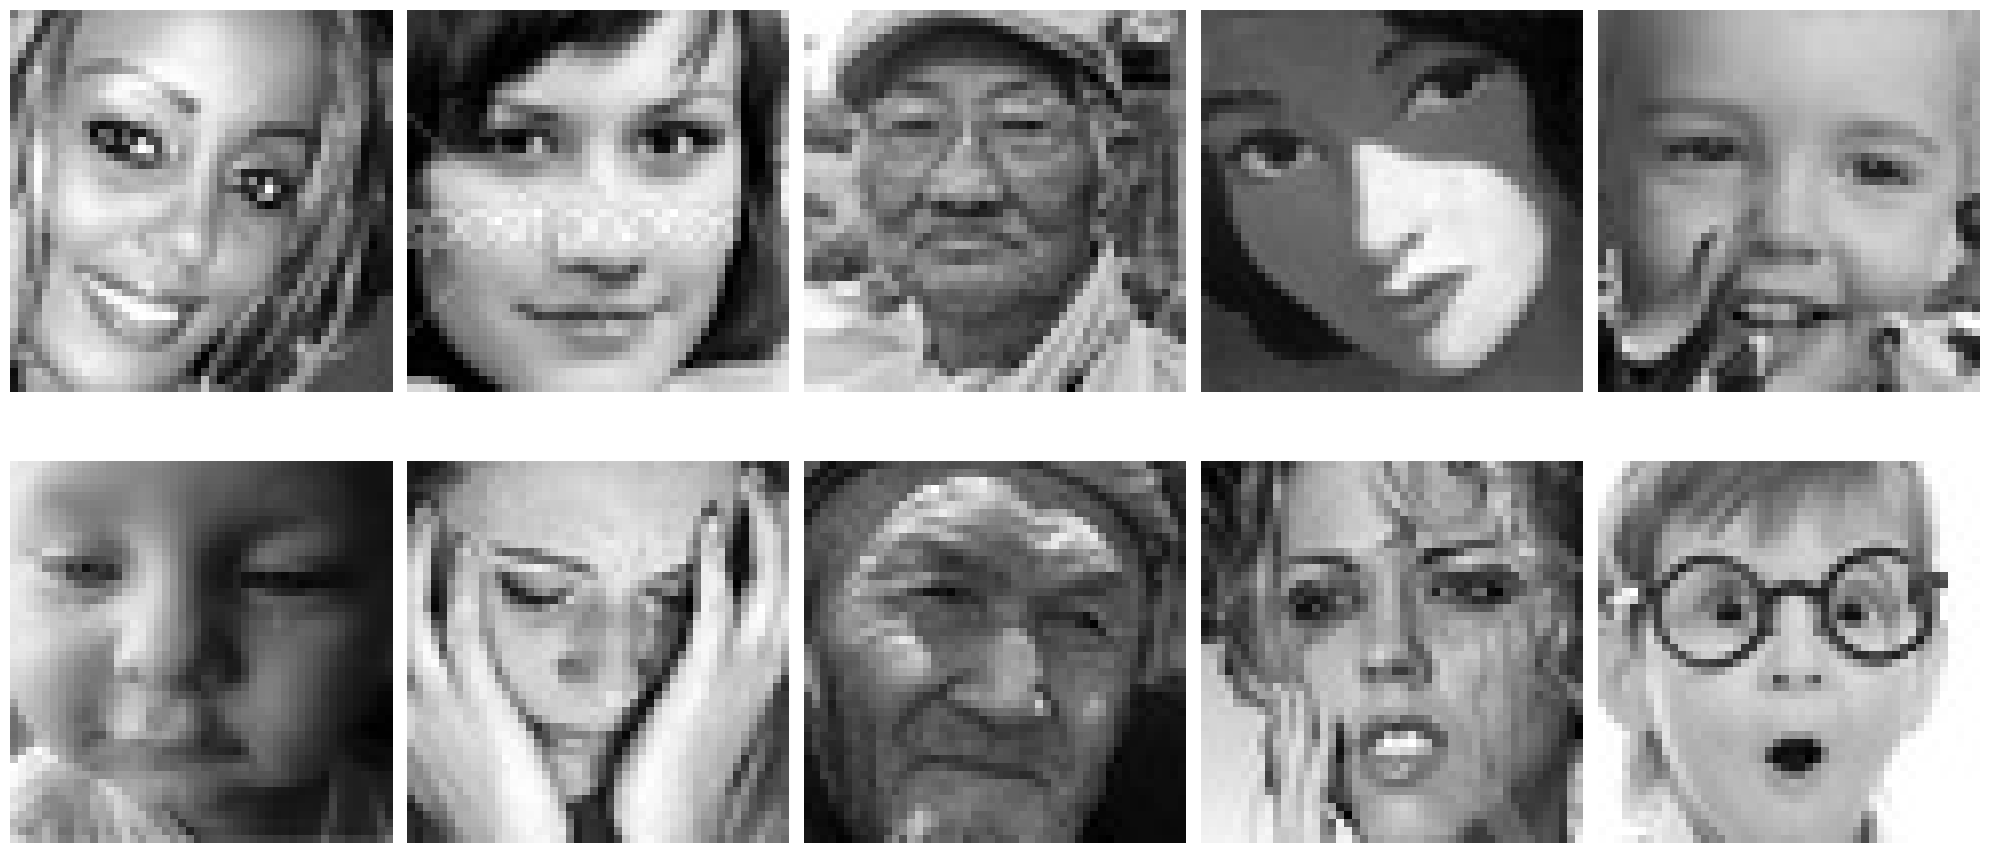

In [232]:
# Set the number of images, the layout, and the size of the images
num_images = 10
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Here we will add the images into our plot
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(train_x[i], cmap='gray')
    ax.axis('off')

# Adjust the layout and show the images
plt.tight_layout()
plt.show()

In [233]:
# We will iterate through the results in a similar fashion
for i, ax in enumerate(axes.flat):
    # This conditional is to match the orientation of the images that we have above.
    if i < num_images and (i + 1) % axes.shape[1] == 0:
        print((train_y[i]))
    else:
        print((train_y[i]), end=" ")

0 0 3 3 0
1 1 3 1 2


In [236]:
# Just for fun, we will take the average of all the images in each individual class.  

happy = np.concat((test_happy, train_happy, validation_happy)).mean(axis=0)
sad = np.concat((test_sad, train_sad, validation_sad)).mean(axis=0)
surprise = np.concat((test_surprise, train_surprise, validation_surprise)).mean(axis=0)
neutral = np.concat((test_neutral, train_neutral, validation_neutral)).mean(axis=0)

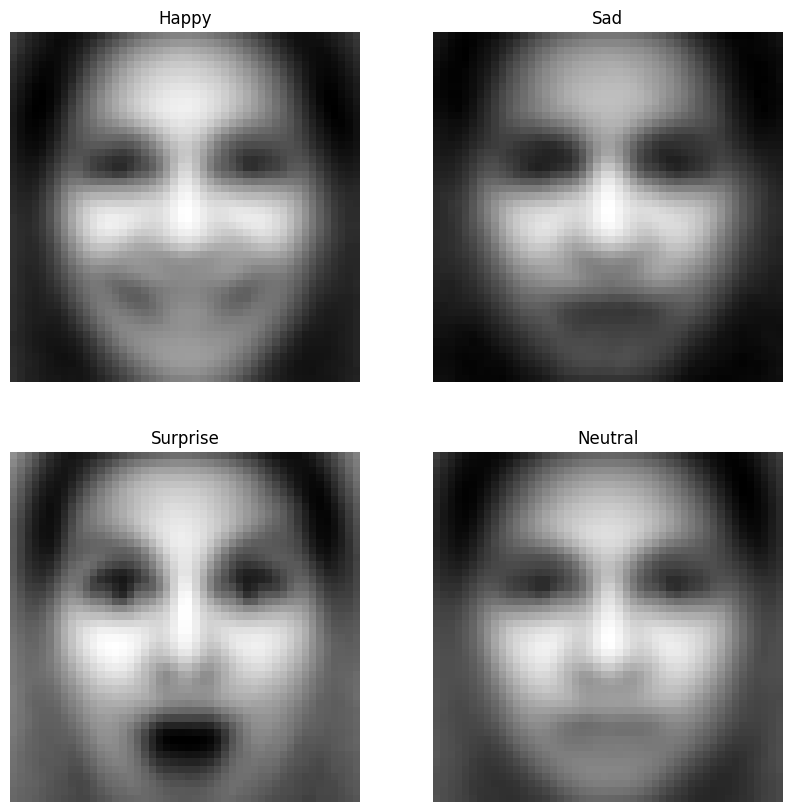

In [241]:
# Provide information on the images you are providing
num_images = 4
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Here we will add the images into our plot
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow((happy, sad, surprise, neutral)[i], cmap='gray')
        # This uses the variable that we read from initially when viewing files
        ax.set_title(emotions[i].title())
    ax.axis('off')

This is a great way to just quickly evaluate that our dataset is correct.  

# Evaluate before Machine Learning

As stated in the [Google Rules for Machine Learning](https://developers.google.com/machine-learning/guides/rules-of-ml), you shouldn't be afraid to evaluate whether or not Machine Learning is the proper task for the job.  In order to evaluate this, let's first use some simple images loss functions and choose a classification based on the per pixel loss.  

The first we will be evaluating is the least squared error function. $$\lambda(x) = C(t-x)^2 \text{ where } C = \frac{1}{2}$$

$$ \text{MSE} = \frac{1}{mn} \sum_{i=1}^{m} \sum_{j=1}^{n} (X_{ij} - Y_{ij})^2 $$

$$ \text{MAE} = \frac{1}{mn} \sum_{i=1}^{m} \sum_{j=1}^{n} |X_{ij} - Y_{ij}| $$

In [291]:
def least_squared_error(t, x):
    return (0.5*(t-x)**2).mean()

In [292]:
train_x[0]

array([[117, 177, 189, ...,  16,   9,  17],
       [170, 198, 211, ...,  29,  10,  14],
       [188, 206, 201, ...,  26,  27,   7],
       ...,
       [ 14,  98, 170, ...,  80,  69,  75],
       [ 19, 101, 165, ...,  73,  78,  71],
       [ 23,  75, 161, ...,  81,  72,  74]], dtype=uint8)

In [293]:
def apply_loss(input_array, function):
    scores = {}
    scores.update({"happy" : function(happy, input_array)})
    scores.update({"sad" : function(sad, input_array)})
    scores.update({"surprise" : function(surprise, input_array)})
    scores.update({"neutral" : function(neutral, input_array)})

    return list(scores.keys())[list(scores.values()).index(min(scores.values()))]

In [295]:
apply_loss(train_x[0], quadratic_loss_function)

'surprise'

$$ \text{SSIM}(x,y) = \frac{(2\mu_x\mu_y + c_1)(2\sigma_{xy} + c_2)}{(\mu_x^2 + \mu_y^2 + c_1)(\sigma_x^2 + \sigma_y^2 + c_2)} $$

In [311]:
# We will continue to add more functions and find which per-pixel loss function performs the best.
def mean_absolute_error(t, x):
    return abs(t-x).mean()

def mean_bias_error(t, x):
    return (t-x).mean()

def mean_squared_logarithmic(t, x):
    return ((np.log1p(t) - np.log1p(x))**2).mean()

In [312]:
print(apply_loss(train_x[0], mean_absolute_error))
print(apply_loss(train_x[0], mean_bias_error))
print(apply_loss(train_x[0], mean_squared_logarithmic))

surprise
sad
sad


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()